In [350]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import math

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [407]:
nifty=pd.read_csv("NIFTY 50_Data.csv")

In [408]:
nifty.head()

,Date,Open,High,Low,Close
0,13 Jul 2022,16128.20,16140.00,15950.15,15966.65
1,12 Jul 2022,16126.20,16158.75,16031.15,16058.30
2,11 Jul 2022,16136.15,16248.55,16115.50,16216.00
3,08 Jul 2022,16273.65,16275.50,16157.90,16220.60
4,07 Jul 2022,16113.75,16150.50,16045.95,16132.90


In [409]:
nifty.tail()

,Date,Open,High,Low,Close
7763,10 Jul 1990,NaN,NaN,NaN,288.69
7764,09 Jul 1990,NaN,NaN,NaN,289.69
7765,06 Jul 1990,NaN,NaN,NaN,289.04
7766,05 Jul 1990,NaN,NaN,NaN,284.04
7767,03 Jul 1990,NaN,NaN,NaN,279.02


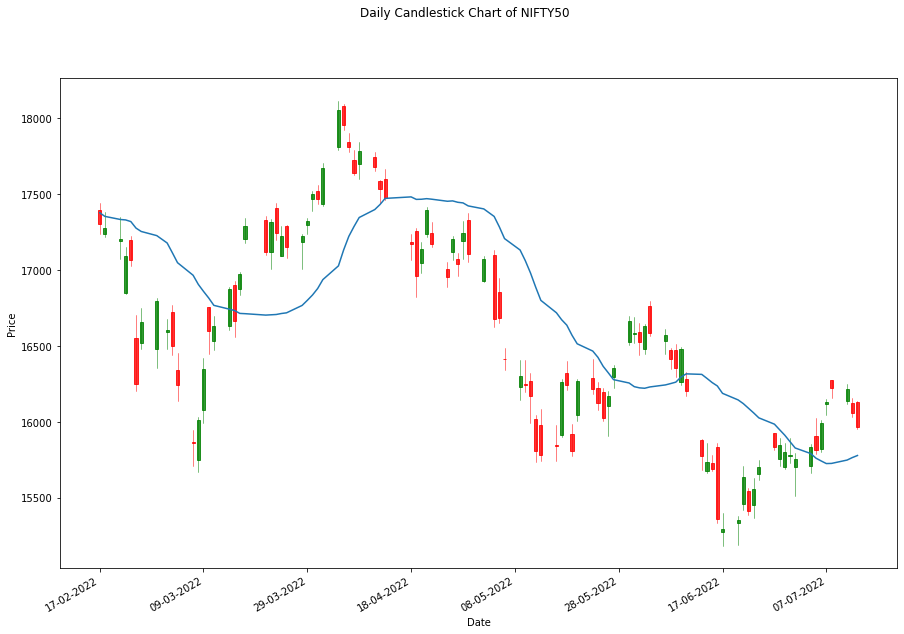

In [195]:
# Creating Subplots
fig, ax = plt.subplots(figsize=(15,10))

candlestick_ohlc(ax, nifty[:100].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.plot(nifty[:100]['Date'],(nifty['Close'][::-1].rolling(20).mean())[-100:][::-1])
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

#fig.tight_layout()

In [412]:
nifty=nifty[::-1]

In [413]:
nifty.dropna(inplace=True)

In [420]:
nifty.reset_index(inplace=True)
nifty.drop('index',axis=1,inplace=True)

In [527]:
nifty

,Date,Open,High,Low,Close,bala,sma
0,1995-11-03 00:00:00+00:00,994.20,1000.91,992.69,1000.00,8208.495793,NaN
1,1995-11-06 00:00:00+00:00,1001.53,1001.53,988.92,988.92,8117.545660,NaN
2,1995-11-07 00:00:00+00:00,987.17,987.17,977.05,978.22,8029.714755,NaN
3,1995-11-08 00:00:00+00:00,976.28,976.28,962.98,964.01,7913.072030,NaN
4,1995-11-09 00:00:00+00:00,960.32,960.32,952.13,953.07,7823.271086,NaN
...,...,...,...,...,...,...,...
6638,2022-07-07 00:00:00+00:00,16113.75,16150.50,16045.95,16132.90,132426.841781,129863.020317
6639,2022-07-08 00:00:00+00:00,16273.65,16275.50,16157.90,16220.60,133146.726862,129870.783311
6640,2022-07-11 00:00:00+00:00,16136.15,16248.55,16115.50,16216.00,133108.967782,130053.131088
6641,2022-07-12 00:00:00+00:00,16126.20,16158.75,16031.15,16058.30,131814.487995,130187.827295


In [526]:
nifty['Date'] = nifty['Date'].apply(mpl_dates.num2date)

In [528]:
flag=0
profit=0
loss=0
startyear=2020
a=nifty.loc[nifty['Date'].apply(lambda x:str(x).startswith(str(startyear)))].index[0]
ini=100000
balance=ini
minbalance=ini
maxbalance=0
bal=[]
for i in range(len(nifty['Close'][a:])):
    bal.append(balance)
    n=int(balance/nifty['Close'][i+a])
    if flag==0 and nifty['Close'][i+a]>=nifty['Close'].rolling(20).mean()[i+a]:
        buy=nifty['Close'][i+a]
        #print("buy on ",str(nifty['Date'][i+a])[:11])
        flag=1
    if flag==1 and nifty['Close'][i+a]<nifty['Close'].rolling(20).mean()[i+a]:
        sell=nifty['Close'][i+a]
        #print("sell on ",str(nifty['Date'][i+a])[:11])
        flag=2
    if flag==2:
        if sell>=buy:
            balance=balance+n*5*(sell-buy)
            #print("Profit of ₹{:.2f} with {:.2f}% on {} for nifty50 price {}".format(n*(sell-buy),500*(sell-buy)/buy,str(nifty['Date'][i+a])[:11],nifty['Close'][i+a]))
        else:
            balance=balance-n*5*(buy-sell)
            #print("Loss of ₹{:.2f} with {:.3f}% on {} for nifty50 price {}".format(n*(buy-sell),500*(buy-sell)/buy,str(nifty['Date'][i+a])[:11],nifty['Close'][i+a]))
        flag=0
        if balance>=maxbalance:
            maxbalance=balance
        else:
            minbalance=balance
    if balance<0:
        print("Total Loss")
        break

res=(balance-ini)/ini
if balance>=ini:
    print("Final Balance is ₹{:.2f} with return of {:.2f}% with cagr of {:.2f}%".format(balance,res*100,(10**(math.log((1+res),10)/(2022-startyear))-1)*100))
else:
    print("Final Balance is ₹{:.2f} with a loss of {:.2f} at {:.2f}%".format(balance,ini-balance,100*(ini-balance)/ini))

ren=(nifty['Close'][i+a]-nifty['Close'][a])/nifty['Close'][a]
print("Nifty Return for the while is {:.2f}% with cagr of {:.2f}%".format(100*ren,(10**(math.log((1+ren),10)/(2022-startyear))-1)*100))
print("Minimum Balance was ₹{:.2f} and Maximum Balance was ₹{:.2f}".format(minbalance,maxbalance))

Final Balance is ₹201978.50 with return of 101.98% with cagr of 42.12%
Nifty Return for the while is 31.06% with cagr of 14.48%
Minimum Balance was ₹201978.50 and Maximum Balance was ₹237052.25


In [529]:
nifty['bala']=nifty['Close']*(ini/nifty['Close'][a])

In [530]:
nifty['Date']=pd.to_datetime(nifty['Date'])
nifty['Date'] = nifty['Date'].apply(mpl_dates.date2num)

In [533]:
nifty

,Date,Open,High,Low,Close,bala,sma
0,9437.0,994.20,1000.91,992.69,1000.00,8208.495793,NaN
1,9440.0,1001.53,1001.53,988.92,988.92,8117.545660,NaN
2,9441.0,987.17,987.17,977.05,978.22,8029.714755,NaN
3,9442.0,976.28,976.28,962.98,964.01,7913.072030,NaN
4,9443.0,960.32,960.32,952.13,953.07,7823.271086,NaN
...,...,...,...,...,...,...,...
6638,19180.0,16113.75,16150.50,16045.95,16132.90,132426.841781,129863.020317
6639,19181.0,16273.65,16275.50,16157.90,16220.60,133146.726862,129870.783311
6640,19184.0,16136.15,16248.55,16115.50,16216.00,133108.967782,130053.131088
6641,19185.0,16126.20,16158.75,16031.15,16058.30,131814.487995,130187.827295


In [532]:
nifty['sma']=nifty['Close'].rolling(20).mean()
nifty['sma']=nifty['sma']*(ini/nifty['sma'][a])

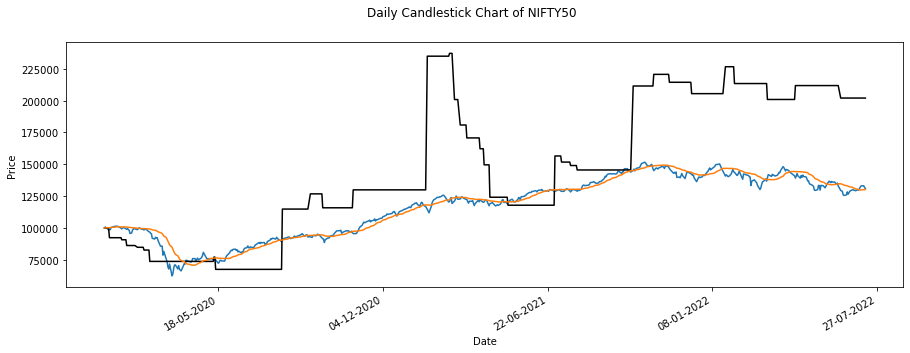

In [534]:
# Creating Subplots
fig, ax = plt.subplots(figsize=(15,5))

#candlestick_ohlc(ax, nifty[a:].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.plot(nifty[a:]['Date'], nifty[a:]['bala'])
plt.plot(nifty[a:]['Date'], bal,'k')
plt.plot(nifty[a:]['Date'], nifty[a:]['sma'])
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

#fig.tight_layout()len(bal)